In [122]:
import pandas as pd
import json
import ast

#preparing housing data from csv so we can load it an run it with a clustering algorithm
#code below reads the final attribute in the csv file which stores a json dump of data
filename = "housing_data.csv"

col_list = ["Lat", "Lon", "Price"]


#splitting data frame in half, ~50% for training ~50% for testing
df = pd.read_csv(filename, usecols=col_list)
df_train = df.head(4292)
df_test = df.tail(4293)


len(df_train.index)
len(df_test.index)

4293

In [123]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=1).fit(df_train)

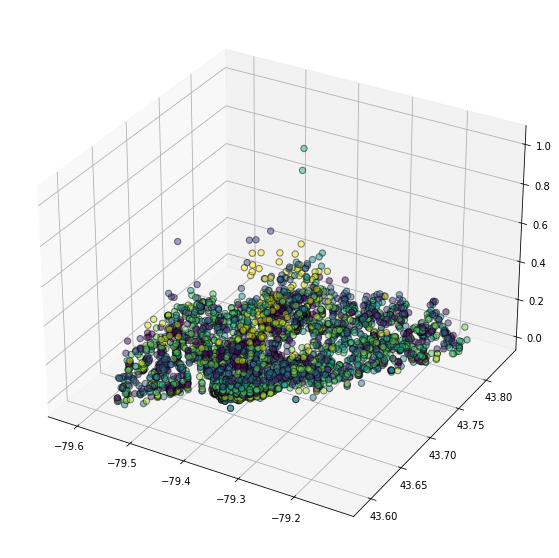

In [124]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_train["Lat"],df_train["Lon"],df_train["Price"], c=kmeans.labels_, cmap='viridis',edgecolor='k', s=40, alpha = 0.5)

ax.dist = 10

# ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True) 

In [125]:
#adding the mean of price of the housing cluster in addition to the location of the cluster centre

centroids=kmeans.cluster_centers_

print(centroids.shape)

#iterating through the list of centroids
index = 0
for cen in centroids:
    
    centroid = df_train[kmeans.labels_==index]
    
    
    
    centroids[2] = centroid["Price"].mean()
    print("\nLat ",cen[0],"\nLon", cen[1],"\nPrice ", cen[2])
    index = index + 1





(15, 3)

Lat  -79.41921583333334 
Lon 43.69473333333333 
Price  2329823.825

Lat  -79.3890292929293 
Lon 43.70047744107744 
Price  785104.4175084176

Lat  1349812.669950739 
Lon 1349812.669950739 
Price  1349812.669950739

Lat  -79.4213 
Lon 43.6802 
Price  7120000.199999999

Lat  -79.394092 
Lon 43.716036 
Price  4269296.52

Lat  -79.39953346007604 
Lon 43.6936288973384 
Price  1624556.44486692

Lat  -79.39252373737374 
Lon 43.7132095959596 
Price  488744.552188552

Lat  -79.39802619047619 
Lon 43.71565476190476 
Price  3507401.976190476

Lat  -79.37494954954956 
Lon 43.707124774774776 
Price  1140026.792792793

Lat  -79.37445 
Lon 43.7401 
Price  10100000.0

Lat  -79.38328634812287 
Lon 43.710125597269624 
Price  950732.418088737

Lat  -79.39735757575758 
Lon 43.69416666666667 
Price  1936862.909090909

Lat  -79.39313910675381 
Lon 43.699433769063184 
Price  628733.6350762524

Lat  -79.40712321428572 
Lon 43.71102142857143 
Price  2826251.321428572

Lat  -79.39905384615385 
Lon 43.70

In [126]:
import geopy.distance
import numpy as np

from haversine import haversine, Unit

# coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

ar = np.zeros((4293,1))

# print( geopy.distance.vincenty(coords_1, coords_2).km)

# print(geopy.distance.distance(coords_1, coords_2).km) 


# go through each row and assign it to the closest centroid

i=0
for row in df_test.iterrows():
    
    #we have a test point
    coordinates_of_test_point = (row[1]["Lat"],row[1]["Lon"])
    
    #set a huge minimum distance
    mini = 1000000000
    
    #index so we can select the correct centroid
    index = 0
    #iterate through the centroids
    for centroid in centroids:
        
        
        #grab the coords of the centroid
        coordinates_of_centroid = (centroid[0],centroid[1])
        
        #calculate the distance between the test point and the centroid
#         dist = geopy.distance.distance(coordinates_of_test_point, coordinates_of_centroid).km
        dist = haversine(coordinates_of_test_point, coordinates_of_centroid)
        closest_centroid_index = 0
        #if the dist is smaller then min 
        if(dist < mini):
            #set mini to that distance
            mini = dist
            #set that centroid to be the one the test point is associated with and store that index
            closest_centroid_index = index    
        
        
#         centroids[closest_centroid_index][2]
        ar[i]= abs(centroids[closest_centroid_index][2] - row[1]["Price"])
        
        
            
        index = index + 1
    i = i +1
        
    
    


In [127]:
print(np.mean(ar))

1389753.772313605
